In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dts

# Checklist da análise exploratória
- [x] Plot de quantidade de reclamações por bairro
- [x] Plot de status de atendimento por RPA
- [x] Plot de de quantidade de tipos de atendimento por RPA 
- [x] Calculo de menor/maior/médio tempo para completar atendimento por bairro
- [x] Calculo de tipo de problema mais/menos resolvido
- [ ] Calculo de ruas com mais reclamações

In [2]:
#Loading Data
emlurb_url = './data/156cco2018.csv'
bairros_url = './data/bairros.geojson'
logradouros_url = './data/trechoslogradouros.geojson'


emlurb_df = pd.read_csv(emlurb_url, sep=';', error_bad_lines=False, warn_bad_lines=True, encoding='latin-1',infer_datetime_format=True)

In [3]:
#Display DataFrame's Cell
emlurb_df['DATA_ULT_SITUACAO'] = pd.to_datetime(emlurb_df['DATA_ULT_SITUACAO'])
emlurb_df['DATA_DEMANDA'] = pd.to_datetime(emlurb_df['DATA_DEMANDA'])

emlurb_df['TEMPO'] = emlurb_df['DATA_ULT_SITUACAO'] - emlurb_df['DATA_DEMANDA']
display(emlurb_df)

,GRUPOSERVICO_CODIGO,GRUPOSERVICO_DESCRICAO,SERVICO_CODIGO,SERVICO_DESCRICAO,LOGRADOURO,NUMERO,BAIRRO,RPA,DATA_DEMANDA,SITUACAO,DATA_ULT_SITUACAO,TEMPO
0,7,ARBORIZAÇÃO,8,PODA DE ARVORES,1TR ESTRADA DO PASSARINHO,125,DOIS IRMAOS,3,2018-04-05,ATENDIDA,2018-09-24,172 days
1,7,ARBORIZAÇÃO,8,PODA DE ARVORES,1TR PRINCIPE BEIRA,32,JIQUIA,5,2018-07-10,ATENDIDA,2018-08-27,48 days
2,7,ARBORIZAÇÃO,8,PODA DE ARVORES,1TR SANTA LUCIA,337 A,IPUTINGA,4,2018-09-19,ATENDIDA,2018-10-19,30 days
3,7,ARBORIZAÇÃO,8,PODA DE ARVORES,2TR ARNALDO PAES DE ANDRADE,75,DOIS IRMAOS,3,2018-07-24,ATENDIDA,2018-08-08,15 days
4,7,ARBORIZAÇÃO,8,PODA DE ARVORES,AV AFONSO OLINDENSE,1946,VARZEA,4,2018-09-19,PENDENTE,2018-09-19,0 days
5,7,ARBORIZAÇÃO,8,PODA DE ARVORES,AV AFONSO OLINDENSE,S/N,VARZEA,4,2018-08-23,ATENDIDA,2018-08-23,0 days
6,7,ARBORIZAÇÃO,8,PODA DE ARVORES,AV ANGRA DOS REIS,100,COHAB,6,2018-06-21,ATENDIDA,2018-07-19,28 days
7,7,ARBORIZAÇÃO,8,PODA DE ARVORES,AV ANGRA DOS REIS,S/N,COHAB,6,2018-08-17,ATENDIDA,2018-08-17,0 days
8,7,ARBORIZAÇÃO,8,PODA DE ARVORES,AV ANIBAL BENEVOLO,SN,AGUA FRIA,2,2018-01-17,ATENDIDA,2018-01-17,0 days
9,7,ARBORIZAÇÃO,8,PODA DE ARVORES,AV ARNALDO PAES DE ANDRADE,49,SITIO DOS PINTOS,3,2018-08-16,ATENDIDA,2018-08-24,8 days


# Contagem de problemas por tipo
A maioria dos problemas relatados envolvem problemas com iluminação.

In [4]:
#Dados de problemas mais resolvidos
contagemProblemas = []
soma = 0
#display(emlurb_df['SERVICO_DESCRICAO'].unique())
servicos = emlurb_df['SERVICO_DESCRICAO'].unique()
#display(servicos[0])
#display((((emlurb_df.loc[emlurb_df['SERVICO_DESCRICAO'].isin([servicos[0]])])['SERVICO_DESCRICAO']).count()))

for tipo in emlurb_df['SERVICO_DESCRICAO'].unique():
    arrayProblema = []
    #arrayProblema.append(tipo)
    arrayProblema.append((((emlurb_df.loc[emlurb_df['SERVICO_DESCRICAO'].isin([tipo])])['SERVICO_DESCRICAO']).count()))
    arrayProblema.append(tipo)
    contagemProblemas.append(arrayProblema)
contagemProblemas.sort(reverse=True)
display(contagemProblemas)

[[25121, 'MANUTENÇÃO EM LÂMPADA APAGADA'],
 [6910, 'OPERAÇÃO TAPA-BURACO EM ASFALTO'],
 [4817, 'LIMP. DE GALERIAS,VALETAS,SARJETAS'],
 [4293, 'VISTORIA DE ARVORES'],
 [3702, 'REMOÇÃO DE ENTULHOS'],
 [2831, 'PODA DE ARVORES'],
 [2089, 'CAPINAÇÃO EM VIA PAVIMENTADA'],
 [2089, 'ACENDER CIRCUITO'],
 [1935, 'REPOSIÇÃO TAMPA DE POÇO, GALERIAS E PRE-MOLDADOS'],
 [1781, 'CAPINAÇÃO EM VIA NÃO PAVIMENTADA'],
 [1677, 'RECUP. DE ABATIMENTO GALERIA'],
 [1424, 'APAGAR LAMPADA'],
 [1342, 'RECUPERAÇÃO DE PAVIMENTO PARALELEPIPEDO'],
 [1132, 'REG. DE VARRICAO OU ESVAZIAR PAPELEIRA'],
 [1096, 'INST. PROV. '],
 [1049, 'IMPLANTACAO DE LUMINARIAS'],
 [958, 'REMOCAO DE PODA DO CIDADAO'],
 [730, 'TERRAPLANAGEM DE RUAS'],
 [703, 'RECAPEAMENTO ASFALTICO'],
 [657, 'INST.PROV. ILUMINACAO PROJETORES'],
 [617, 'REPOSICAO DE LUMINARIA'],
 [566, 'LIMPEZA DE ESCADARIAS'],
 [510, 'REGULARIZAR COLETA DOMICILIAR'],
 [509, 'RECUP. DE ESCADARIA'],
 [500, 'LIMPEZA DE CANAL'],
 [438, 'IMPLANTACAO DE POSTE'],
 [411, 'ERRADICA

# Contagem de problemas por rua
A rua com mais problemas é a Rua Projetada. Assumimos que ela tem mais reclamações pois é uma via para se chegar à BR-232, é caminho para o TIP, e também para a Arena Pernambuco, então seu fluxo de veículos é grande, sendo muitos deles veículos de grande porte.

Os outros logradouros são grandes avenidas, o que era de se esperar, já que são vias de com muito movimento durante o dia inteiro.

In [5]:
#Dados de problemas mais resolvidos
contagemRuas = []
soma = 0
#display(emlurb_df['LOGRADOURO'].unique())
logradouros = emlurb_df['LOGRADOURO'].unique()
display(len(logradouros))
display((((emlurb_df.loc[emlurb_df['LOGRADOURO'].isin(logradouros)])['LOGRADOURO']).count()))

for logradouro in emlurb_df['LOGRADOURO'].unique():
    arrayLogradouro = []
    arrayProblema.append(tipo)
    arrayLogradouro.append((((emlurb_df.loc[emlurb_df['LOGRADOURO'].isin([logradouro])])['LOGRADOURO']).count()))
    arrayLogradouro.append(logradouro)
    contagemRuas.append(arrayLogradouro)
contagemRuas.sort(reverse=True)
display(contagemRuas)

7052

76906

[[2898, 'RUA  PROJETADA'],
 [533, 'AV GOVERNADOR AGAMENON MAGALHAES'],
 [481, 'AV  NORTE MIGUEL ARRAES DE ALENCAR'],
 [397, 'AV  BOA VIAGEM'],
 [315, 'AV  SUL GOV  CID SAMPAIO'],
 [310, 'AV MARECHAL MASCARENHAS DE MORAES'],
 [300, 'RUA VISCONDE JEQUITINHONHA'],
 [300, 'AV  CENTRAL'],
 [297, 'AV DR JOSE RUFINO'],
 [280, 'AV  RECIFE'],
 [279, 'AV  BEBERIBE'],
 [237, 'RUA  AURORA'],
 [237, 'AV PROFESSOR JOSE DOS ANJOS'],
 [230, 'AV CONS AGUIAR'],
 [219, 'AV  CAXANGA'],
 [209, 'ROD  BR CENTO E UM'],
 [208, 'AV ENGENHEIRO ABDIAS DE CARVALHO'],
 [205, 'AV ENGENHEIRO DOMINGOS FERREIRA'],
 [193, 'AV  DANTAS BARRETO'],
 [185, 'AV  MAURICIO DE NASSAU'],
 [179, 'AV CONDE BOA VISTA'],
 [176, 'EST  ARRAIAL'],
 [175, 'AV  BRASILIA FORMOSA'],
 [166, 'AV ENGENHEIRO JOSE ESTELITA'],
 [164, 'AV VEREADOR OTACILIO AZEVEDO'],
 [164, 'AV GENERAL SAN MARTIN'],
 [158, 'AV  BEIRA RIO'],
 [156, 'RUA  VINTE E UM DE ABRIL'],
 [150, 'AV  CRUZ CABUGA'],
 [143, 'RUA  NOVA DESCOBERTA'],
 [143, 'AV  RUI BARBOSA'],
 [1

In [6]:
#display((((emlurb_df.loc[emlurb_df['LOGRADOURO'].isin(['RUA  PROJETADA'])]))).count())
display((((emlurb_df.loc[emlurb_df['LOGRADOURO'].isin(['RUA  PROJETADA'])]))))

,GRUPOSERVICO_CODIGO,GRUPOSERVICO_DESCRICAO,SERVICO_CODIGO,SERVICO_DESCRICAO,LOGRADOURO,NUMERO,BAIRRO,RPA,DATA_DEMANDA,SITUACAO,DATA_ULT_SITUACAO,TEMPO
1823,7,ARBORIZAÇÃO,8,PODA DE ARVORES,RUA PROJETADA,00,COHAB,6,2018-08-22,ATENDIDA,2018-08-27,5 days
1824,7,ARBORIZAÇÃO,8,PODA DE ARVORES,RUA PROJETADA,00,CORDEIRO,4,2018-05-21,ATENDIDA,2018-06-28,38 days
1825,7,ARBORIZAÇÃO,8,PODA DE ARVORES,RUA PROJETADA,00,IBURA,6,2018-08-13,EXECUÇÃO,2018-08-13,0 days
1826,7,ARBORIZAÇÃO,8,PODA DE ARVORES,RUA PROJETADA,100,ESTANCIA,5,2018-06-07,ATENDIDA,2018-07-20,43 days
1827,7,ARBORIZAÇÃO,8,PODA DE ARVORES,RUA PROJETADA,108,CAMPINA DO BARRETO,2,2018-03-16,ATENDIDA,2018-04-13,28 days
1828,7,ARBORIZAÇÃO,8,PODA DE ARVORES,RUA PROJETADA,1080,IMBIRIBEIRA,6,2018-04-04,ATENDIDA,2018-11-09,219 days
1829,7,ARBORIZAÇÃO,8,PODA DE ARVORES,RUA PROJETADA,117,ARRUDA,2,2018-04-19,ATENDIDA,2018-05-10,21 days
1830,7,ARBORIZAÇÃO,8,PODA DE ARVORES,RUA PROJETADA,13,CAMPINA DO BARRETO,2,2018-10-19,EXECUÇÃO,2018-10-19,0 days
1831,7,ARBORIZAÇÃO,8,PODA DE ARVORES,RUA PROJETADA,151,CASA FORTE,3,2018-04-26,ATENDIDA,2018-07-05,70 days
1832,7,ARBORIZAÇÃO,8,PODA DE ARVORES,RUA PROJETADA,151,CASA FORTE,3,2018-05-24,ATENDIDA,2018-08-07,75 days


# Medidas estatísticas por Bairro
    Exibimos Min, Max, Media, Mediana, Moda e Contagem dos problemas de cada bairro

In [7]:
#df.groupby('id')['B'].agg([pd.np.min, pd.np.max, pd.np.mean])
tempoArray = []
temp_df = (emlurb_df.loc[emlurb_df['SITUACAO'].isin(['ATENDIDA'])])
soma = 0
for bairro in temp_df['BAIRRO'].unique():
    array = []
    array.append(((emlurb_df.loc[emlurb_df['BAIRRO'].isin([bairro])])['TEMPO']).min().days)
    array.append(((emlurb_df.loc[emlurb_df['BAIRRO'].isin([bairro])])['TEMPO']).max().days)
    array.append(((emlurb_df.loc[emlurb_df['BAIRRO'].isin([bairro])])['TEMPO']).mean().days)
    array.append(((emlurb_df.loc[emlurb_df['BAIRRO'].isin([bairro])])['TEMPO']).median().days)
    array.append((((emlurb_df.loc[emlurb_df['BAIRRO'].isin([bairro])])['TEMPO']).mode())[0].days)
    array.append(((emlurb_df.loc[emlurb_df['BAIRRO'].isin([bairro])])['TEMPO']).count())
    tempoArray.append(array)
    display(bairro)
    display(array)
    soma = soma + ((emlurb_df.loc[emlurb_df['BAIRRO'].isin([bairro])])['TEMPO']).count()
#display(temp_df)
#display(tempoArray)
#display(soma)

'DOIS IRMAOS'

[0, 174, 4, 2, 0, 412]

'JIQUIA'

[0, 245, 15, 1, 0, 657]

'IPUTINGA'

[0, 270, 9, 1, 0, 1942]

'VARZEA'

[0, 258, 8, 1, 0, 2868]

'COHAB'

[0, 250, 10, 1, 0, 3354]

'AGUA FRIA'

[0, 288, 10, 2, 0, 1533]

'SITIO DOS PINTOS'

[0, 168, 10, 2, 0, 281]

'BEBERIBE'

[0, 191, 10, 3, 0, 385]

'ENCRUZILHADA'

[0, 277, 9, 2, 0, 736]

'PORTO DA MADEIRA'

[0, 284, 7, 2, 0, 202]

'ILHA DO RETIRO'

[0, 214, 6, 1, 0, 217]

'MADALENA'

[0, 272, 8, 1, 0, 1471]

'TORRE'

[0, 288, 9, 1, 0, 857]

'BOA VIAGEM'

[0, 297, 8, 1, 0, 4668]

'PINA'

[0, 154, 5, 1, 0, 1373]

'CAXANGA'

[0, 290, 9, 1, 0, 678]

'CORDEIRO'

[0, 306, 10, 1, 0, 2059]

'BARRO'

[0, 272, 12, 1, 0, 1136]

'AFOGADOS'

[0, 288, 8, 1, 0, 2071]

'MANGUEIRA'

[0, 186, 3, 1, 0, 219]

'ILHA JOANA BEZERRA'

[0, 253, 10, 0, 0, 560]

'AREIAS'

[0, 232, 9, 1, 0, 1459]

'IPSEP'

[0, 211, 7, 1, 0, 1513]

'SANTO AMARO'

[0, 307, 7, 0, 0, 2870]

'SAO JOSE'

[0, 223, 7, 0, 0, 1293]

'SANTO ANTONIO'

[0, 263, 5, 1, 0, 867]

'CASA FORTE'

[0, 190, 9, 2, 0, 514]

'JORDAO'

[0, 228, 11, 2, 0, 1300]

'ESTANCIA'

[0, 245, 9, 1, 0, 630]

'PARNAMIRIM'

[0, 172, 9, 1, 0, 373]

'SANCHO'

[0, 209, 6, 1, 0, 286]

'TORROES'

[0, 236, 8, 1, 0, 1026]

'ESPINHEIRO'

[0, 265, 10, 1, 0, 506]

'BOA VISTA'

[0, 298, 9, 1, 0, 1598]

'IMBIRIBEIRA'

[0, 301, 9, 1, 0, 3031]

'NOVA DESCOBERTA'

[0, 246, 10, 3, 0, 1268]

'TOTO'

[0, 139, 4, 1, 0, 215]

'CURADO'

[0, 252, 5, 1, 0, 405]

'TEJIPIO'

[0, 207, 6, 1, 0, 454]

'ENGENHO DO MEIO'

[0, 204, 9, 1, 0, 712]

'MACAXEIRA'

[0, 215, 7, 2, 0, 906]

'ROSARINHO'

[0, 288, 12, 2, 0, 305]

'CASA AMARELA'

[0, 285, 7, 2, 0, 1590]

'TORREAO'

[0, 215, 8, 1, 0, 214]

'CACOTE'

[0, 71, 4, 1, 0, 191]

'JARDIM SAO PAULO'

[0, 271, 8, 1, 0, 1483]

'DOIS UNIDOS'

[0, 262, 10, 3, 0, 1470]

'GRACAS'

[0, 187, 8, 2, 0, 654]

'JAQUEIRA'

[0, 115, 3, 0, 0, 265]

'CABANGA'

[0, 272, 5, 0, 0, 413]

'CAJUEIRO'

[0, 175, 13, 5, 0, 435]

'BREJO DE BEBERIBE'

[0, 130, 9, 2, 0, 198]

'AFLITOS'

[0, 97, 8, 1, 0, 150]

'SAN MARTIN'

[0, 277, 6, 1, 0, 1202]

'BONGI'

[0, 308, 10, 1, 0, 530]

'PRADO'

[0, 251, 9, 1, 0, 603]

'DERBY'

[0, 132, 5, 1, 0, 383]

'CAMPO GRANDE'

[0, 261, 9, 2, 0, 1878]

'ILHA DO LEITE'

[0, 229, 4, 0, 0, 337]

'RECIFE'

[0, 258, 4, 1, 0, 922]

'CIDADE UNIVERSITARIA'

[0, 139, 6, 0, 0, 103]

'ARRUDA'

[0, 200, 8, 1, 0, 630]

'MANGABEIRA'

[0, 105, 11, 2, 0, 215]

'TAMARINEIRA'

[0, 176, 8, 2, 0, 636]

'GUABIRABA'

[0, 158, 5, 2, 0, 474]

'MORRO DA CONCEICAO'

[0, 241, 9, 1, 0, 409]

'POCO'

[0, 198, 7, 2, 0, 333]

'COELHOS'

[0, 252, 8, 0, 0, 283]

'BRASILIA TEIMOSA'

[0, 238, 5, 1, 0, 933]

'ZUMBI'

[0, 215, 8, 1, 0, 237]

'SANTANA'

[0, 146, 7, 1, 0, 208]

'IBURA'

[0, 250, 13, 2, 0, 2188]

'VASCO DA GAMA'

[0, 250, 10, 3, 0, 1298]

'ALTO JOSE BONIFACIO'

[0, 204, 10, 2, 0, 635]

'APIPUCOS'

[0, 216, 8, 1, 0, 244]

'BOMBA DO HEMETERIO'

[0, 149, 5, 1, 0, 277]

'HIPODROMO'

[0, 182, 6, 2, 0, 216]

'MUSTARDINHA'

[0, 288, 11, 1, 0, 574]

'CAMPINA DO BARRETO'

[0, 227, 7, 1, 0, 611]

'PONTO DE PARADA'

[0, 205, 8, 1, 0, 91]

'LINHA DO TIRO'

[0, 170, 8, 2, 0, 522]

'PAISSANDU'

[0, 199, 8, 0, 0, 137]

'SOLEDADE'

[0, 205, 8, 0, 0, 74]

'PEIXINHOS'

[0, 242, 7, 0, 0, 79]

'ALTO DO MANDU'

[0, 134, 7, 1, 0, 233]

'FUNDAO'

[0, 108, 9, 2, 0, 248]

'PASSARINHO'

[0, 224, 9, 2, 0, 818]

'ALTO JOSE DO PINHO'

[0, 243, 12, 2, 0, 401]

'MONTEIRO'

[0, 272, 13, 2, 0, 103]

'COQUEIRAL'

[0, 281, 6, 1, 0, 461]

'CORREGO DO JENIPAPO'

[0, 278, 12, 3, 0, 235]

'ALTO SANTA TEREZINHA'

[0, 155, 12, 4, 0, 298]

'BREJO DA GUABIRABA'

[0, 210, 10, 3, 0, 574]

# Gráficos por RPA
    -Quantidade de problemas por Bairro de uma dada RPA
    -Descrição dos Serviços registrados na RPA*
    -Situação dos Serviços registrados na RPA

### RPA 6

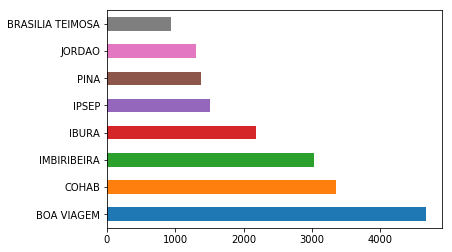

In [8]:
(emlurb_df.loc[emlurb_df['RPA'].isin([6])])['BAIRRO'].value_counts().plot.barh()

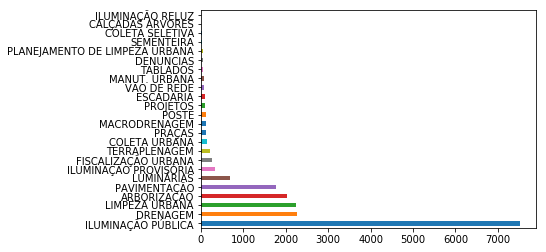

In [9]:
#Plot graphs
#(emlurb_df.loc[emlurb_df['RPA'].isin([6])])
(emlurb_df.loc[emlurb_df['RPA'].isin([6])])['GRUPOSERVICO_DESCRICAO'].value_counts().plot.barh()

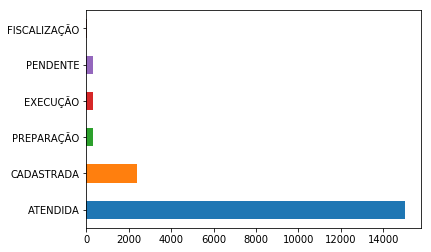

In [10]:
(emlurb_df.loc[emlurb_df['RPA'].isin([6])])['SITUACAO'].value_counts().plot.barh()

### RPA 5

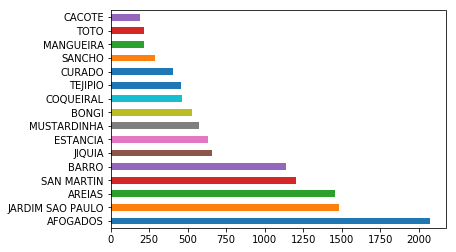

In [11]:
(emlurb_df.loc[emlurb_df['RPA'].isin([5])])['BAIRRO'].value_counts().plot.barh()

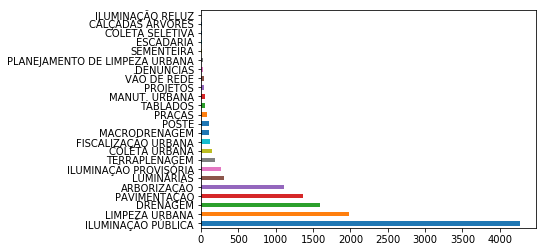

In [12]:
#Plot graphs
#(emlurb_df.loc[emlurb_df['RPA'].isin([6])])
(emlurb_df.loc[emlurb_df['RPA'].isin([5])])['GRUPOSERVICO_DESCRICAO'].value_counts().plot.barh()

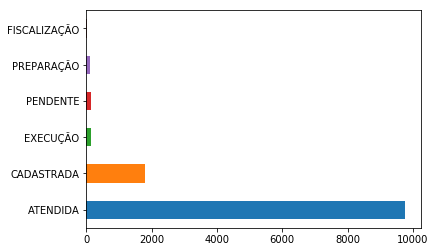

In [13]:
#Plot graphs
#(emlurb_df.loc[emlurb_df['RPA'].isin([6])])
(emlurb_df.loc[emlurb_df['RPA'].isin([5])])['SITUACAO'].value_counts().plot.barh()

### RPA 4

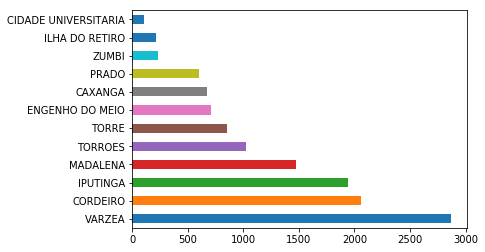

In [14]:
(emlurb_df.loc[emlurb_df['RPA'].isin([4])])['BAIRRO'].value_counts().plot.barh()

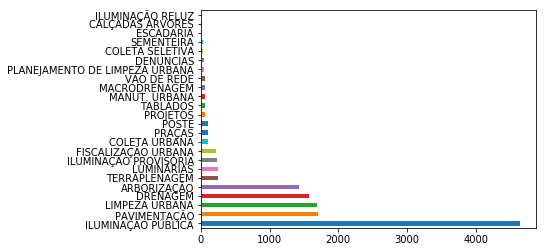

In [15]:
#Plot graphs
#(emlurb_df.loc[emlurb_df['RPA'].isin([6])])
(emlurb_df.loc[emlurb_df['RPA'].isin([4])])['GRUPOSERVICO_DESCRICAO'].value_counts().plot.barh()

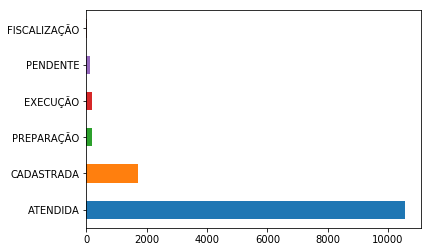

In [16]:
#Plot graphs
#(emlurb_df.loc[emlurb_df['RPA'].isin([6])])
(emlurb_df.loc[emlurb_df['RPA'].isin([4])])['SITUACAO'].value_counts().plot.barh()

### RPA 3

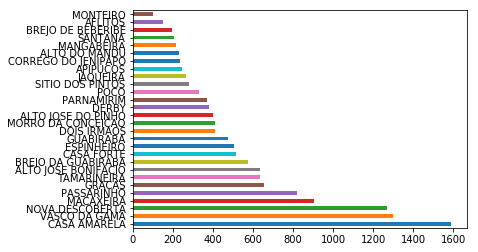

In [17]:
(emlurb_df.loc[emlurb_df['RPA'].isin([3])])['BAIRRO'].value_counts().plot.barh()

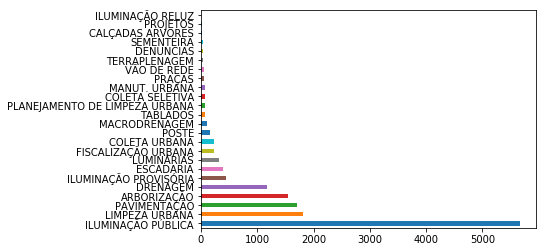

In [18]:
#Plot graphs
#(emlurb_df.loc[emlurb_df['RPA'].isin([6])])
(emlurb_df.loc[emlurb_df['RPA'].isin([3])])['GRUPOSERVICO_DESCRICAO'].value_counts().plot.barh()

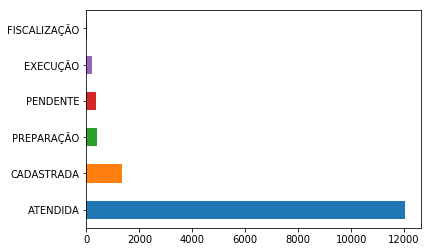

In [19]:
#Plot graphs
#(emlurb_df.loc[emlurb_df['RPA'].isin([6])])
(emlurb_df.loc[emlurb_df['RPA'].isin([3])])['SITUACAO'].value_counts().plot.barh()

### RPA 2

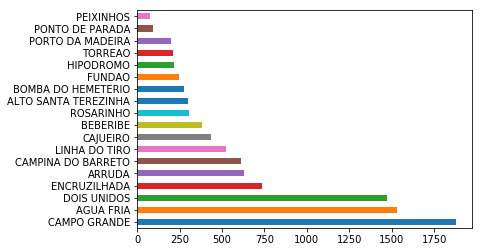

In [20]:
(emlurb_df.loc[emlurb_df['RPA'].isin([2])])['BAIRRO'].value_counts().plot.barh()

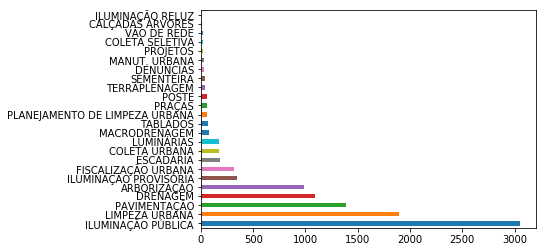

In [21]:
#Plot graphs
#(emlurb_df.loc[emlurb_df['RPA'].isin([6])])
(emlurb_df.loc[emlurb_df['RPA'].isin([2])])['GRUPOSERVICO_DESCRICAO'].value_counts().plot.barh()

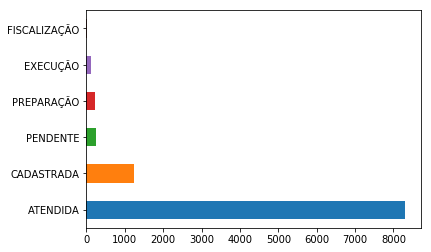

In [22]:
#Plot graphs
#(emlurb_df.loc[emlurb_df['RPA'].isin([6])])
(emlurb_df.loc[emlurb_df['RPA'].isin([2])])['SITUACAO'].value_counts().plot.barh()

### RPA 1

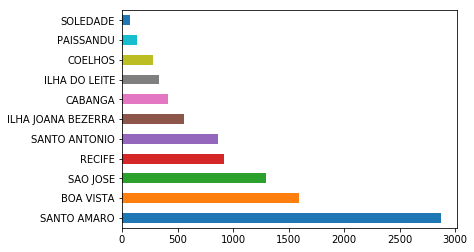

In [23]:
(emlurb_df.loc[emlurb_df['RPA'].isin([1])])['BAIRRO'].value_counts().plot.barh()

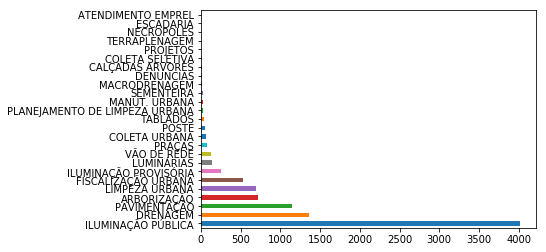

In [24]:
#Plot graphs
#(emlurb_df.loc[emlurb_df['RPA'].isin([6])])
(emlurb_df.loc[emlurb_df['RPA'].isin([1])])['GRUPOSERVICO_DESCRICAO'].value_counts().plot.barh()

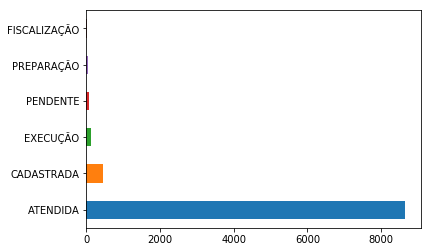

In [25]:
#Plot graphs
#(emlurb_df.loc[emlurb_df['RPA'].isin([6])])
(emlurb_df.loc[emlurb_df['RPA'].isin([1])])['SITUACAO'].value_counts().plot.barh()

In [26]:
dados_scrapping = 'dados_corrigidos.csv'
scrapping = pd.read_csv(dados_scrapping)
scrapping['nome_bairro']= scrapping['nome_bairro'].map(lambda a: a.upper())
scrapping['nome_bairro']= scrapping['nome_bairro'].str.replace(u"Ç","C")
scrapping['nome_bairro']= scrapping['nome_bairro'].str.replace(u"BAIRRO DO RECIFE","RECIFE")
scrapping['nome_bairro']= scrapping['nome_bairro'].str.replace(u"BREJO DO","BREJO DE")
scrapping['nome_bairro']= scrapping['nome_bairro'].str.replace(u"POCO DA PANELA","POCO")
scrapping['nome_bairro']= scrapping['nome_bairro'].str.replace(u"PAU-FERRO","PAU FERRO")
scrapping['nome_bairro']= scrapping['nome_bairro'].str.replace(u"Á","A")
scrapping['nome_bairro']= scrapping['nome_bairro'].str.replace(u"Â","A")
scrapping['nome_bairro']= scrapping['nome_bairro'].str.replace(u"Ã","A")
scrapping['nome_bairro']= scrapping['nome_bairro'].str.replace(u"É","E")
scrapping['nome_bairro']= scrapping['nome_bairro'].str.replace(u"Í","I")
scrapping['nome_bairro']= scrapping['nome_bairro'].str.replace(u"Ó","O")
scrapping['nome_bairro']= scrapping['nome_bairro'].str.replace(u"Ô","O")
scrapping['nome_bairro']= scrapping['nome_bairro'].str.replace(u"Õ","O")
scrapping

,Unnamed: 0,Unnamed: 0.1,alfab_dez_mais,area_hectare,dens_dem,dist_marco_zero,morador_por_domic,nome_bairro,num_domic,pop_0_4,...,pop_porc_amarela,pop_porc_branca,pop_porc_indigena,pop_porc_parda,pop_porc_preta,populacao,prop_resp_fem,rend_medio,rpa,taxa_m_cresc
0,0,0,81.7,270,2.23,0.00,3.0,RECIFE,198,50,...,0.50,3.89,0.50,30.72,34.39,602,66.83,567.00,1,-4.20
1,1,1,98.5,176,84.15,2.78,2.4,BOA VISTA,5999,447,...,1.25,59.90,0.26,33.37,5.22,14778,54.43,3618.45,1,0.52
2,2,2,94.5,81,19.16,3.26,3.1,CABANGA,506,73,...,1.35,41.78,0.32,45.13,11.41,1551,57.00,1986.08,1,0.10
3,3,3,87.7,43,178.51,2.15,3.6,COELHOS,2322,579,...,0.86,31.50,0.72,53.36,13.56,7633,53.63,898.41,1,1.12
4,4,4,96.8,26,38.21,2.64,2.8,ILHA DO LEITE,361,39,...,1.49,58.39,0.40,33.86,5.86,1007,56.79,3024.11,1,0.49
5,5,5,83.2,87,144.85,2.89,3.5,ILHA JOANA BEZERRA,3606,1158,...,0.78,24.62,0.21,58.22,16.17,12629,57.31,705.83,1,-0.10
6,6,6,98.5,34,14.70,3.00,2.7,PAISSANDU,180,12,...,0.39,80.87,0.00,16.96,1.78,507,58.33,5115.06,1,-0.46
7,7,7,90.5,380,73.52,1.98,3.3,SANTO AMARO,8474,1745,...,1.30,34.49,0.30,54.27,9.64,27939,55.32,1892.10,1,-0.42
8,8,8,99.3,81,3.53,0.82,1.7,SANTO ANTONIO,142,2,...,2.81,32.98,1.75,57.19,5.26,285,34.27,1477.92,1,-6.17
9,9,9,87.2,326,26.62,2.21,3.2,SAO JOSE,2704,668,...,0.61,28.67,0.15,62.43,8.14,8688,51.56,1402.11,1,0.04


In [27]:
prob_bairros = emlurb_df['BAIRRO'].value_counts()
scrapping = scrapping.join(prob_bairros, on=['nome_bairro'])
scrapping['qtd_chamados'] = scrapping['BAIRRO']
scrapping = scrapping.drop(columns=['BAIRRO'])
scrapping['chamados_p_area'] = scrapping['qtd_chamados']/scrapping['area_hectare']
#scrapping.to_csv('dados+norm.csv')

In [28]:

display(scrapping.sort_values(['chamados_p_area']))
scrapping['chamados_p_area'].describe()
scrapping.to_csv('dados+norm.csv')

,Unnamed: 0,Unnamed: 0.1,alfab_dez_mais,area_hectare,dens_dem,dist_marco_zero,morador_por_domic,nome_bairro,num_domic,pop_0_4,...,pop_porc_indigena,pop_porc_parda,pop_porc_preta,populacao,prop_resp_fem,rend_medio,rpa,taxa_m_cresc,qtd_chamados,chamados_p_area
92,92,92,90.3,798,20.56,9.68,3.3,CURADO,4900,1258,...,0.23,56.94,8.02,16418,40.08,1216.36,5,1.99,405.0,0.507519
51,51,51,92.8,162,5.05,8.89,3.5,CIDADE UNIVERSITARIA,222,63,...,0.24,58.07,7.21,818,32.88,2044.30,4,3.10,103.0,0.635802
87,87,87,93.1,585,4.39,10.40,3.5,DOIS IRMAOS,737,177,...,1.09,55.53,7.91,2566,44.10,1936.10,3,-1.70,412.0,0.704274
36,36,36,85.6,617,1.37,13.43,3.5,GUABIRABA,1779,480,...,0.44,55.12,11.55,6330,42.34,1159.26,3,-1.44,474.0,0.768233
47,47,47,91.5,180,40.49,10.99,3.4,SITIO DOS PINTOS,2132,497,...,0.48,51.33,10.77,7276,44.59,1841.34,3,2.54,281.0,1.561111
30,30,30,91.0,134,25.01,8.87,3.4,APIPUCOS,991,227,...,0.21,59.84,7.09,3342,51.26,2162.86,3,-0.37,244.0,1.820896
40,40,40,96.3,53,111.61,7.59,3.4,MONTEIRO,1742,367,...,0.12,38.80,6.20,5917,42.02,7106.75,3,2.24,103.0,1.943396
90,90,90,87.1,406,49.98,10.97,3.5,PASSARINHO,5792,1733,...,0.04,66.65,7.75,20305,41.31,824.02,3,2.79,818.0,2.014778
82,82,82,92.2,629,46.38,4.57,3.1,PINA,9457,1884,...,0.24,51.24,9.89,29176,49.65,2446.83,6,0.62,1373.0,2.182830
10,10,10,98.2,32,77.06,2.18,2.4,SOLEDADE,1013,62,...,0.52,32.27,4.61,2495,57.04,3747.16,1,1.26,74.0,2.312500


# Celulas mais especificas para o relatorio

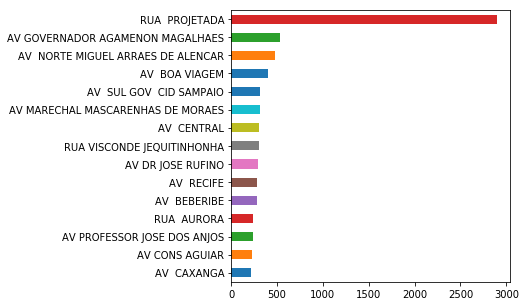

In [74]:
emlurb_df['LOGRADOURO'].value_counts().sort_values().tail(15).plot.barh(figsize=(5,5))

In [64]:
display(scrapping[['nome_bairro','qtd_chamados','area_hectare','chamados_p_area']].sort_values(['area_hectare']))

,nome_bairro,qtd_chamados,area_hectare,chamados_p_area
75,TOTO,215.0,14,15.357143
28,TORREAO,214.0,16,13.375000
78,IBURA,2188.0,19,115.157895
25,PONTO DE PARADA,91.0,20,4.550000
37,JAQUEIRA,265.0,24,11.041667
27,ROSARINHO,305.0,25,12.200000
29,ALTO DO MANDU,233.0,25,9.320000
4,ILHA DO LEITE,337.0,26,12.961538
39,MANGABEIRA,215.0,29,7.413793
22,HIPODROMO,216.0,30,7.200000


In [62]:
scrapping['chamados_p_area'].describe()

count     93.000000
mean       7.639661
std       11.710214
min        0.507519
25%        4.208333
50%        6.365854
75%        8.227848
max      115.157895
Name: chamados_p_area, dtype: float64